## Pair Programming - Regresión lineal 3

### Asunciones

---

In [55]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
from scipy import stats
import researchpy as rp
from scipy.stats import levene

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv("../archivos/metro_1.csv", index_col=0)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48187 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48187 non-null  object 
 1   temp                 48187 non-null  float64
 2   rain_1h              48187 non-null  float64
 3   snow_1h              48187 non-null  float64
 4   clouds_all           48187 non-null  int64  
 5   weather_main         48187 non-null  object 
 6   weather_description  48187 non-null  object 
 7   date_time            48187 non-null  object 
 8   traffic_volume       48187 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.7+ MB


In [58]:
df.head(2)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516


En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
El objetivo de este pairprogramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. 
- Normalidad (evaluada en el pair anterior)


Vimos que la asunción de normalidad sobre nuestra variable respuesta "traffic_volume" nos indica que nuestros datos no son normales, aceptando la H0.

- Cada asunción la deberéis testar de forma visual y analítica.

___

- Homogeneidad de varianzas


Empezamos sacando las gráficas para ver la homogeneidad, la columna "date_time" la obviaremos, dado que no tiene mucho sentido, ya que aunque es de tipo object tiene más de 40000 registros únicos.

In [59]:
df_numericas = df.select_dtypes(include=np.number)

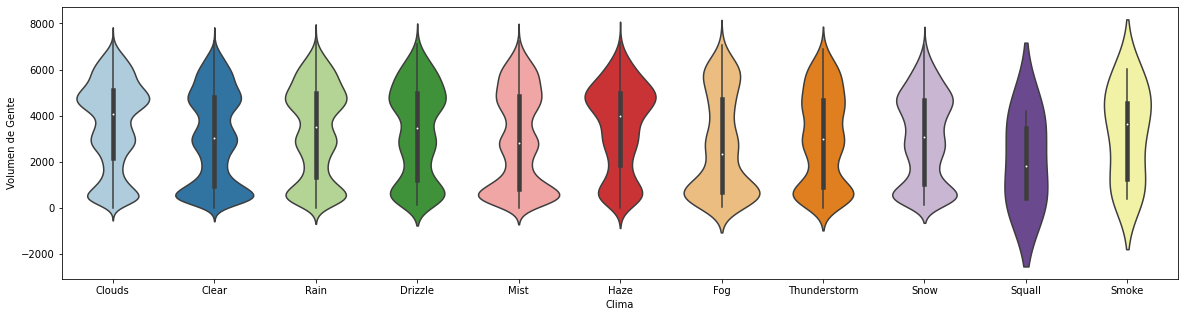

In [60]:
plt.figure( figsize=(20,5))

sns.violinplot(x= "weather_main", y= "traffic_volume", data=df, palette="Paired")
#plt.set_tittle("Distribución clima por día/hora")
plt.ylabel("Volumen de Gente")
plt.xlabel("Clima");


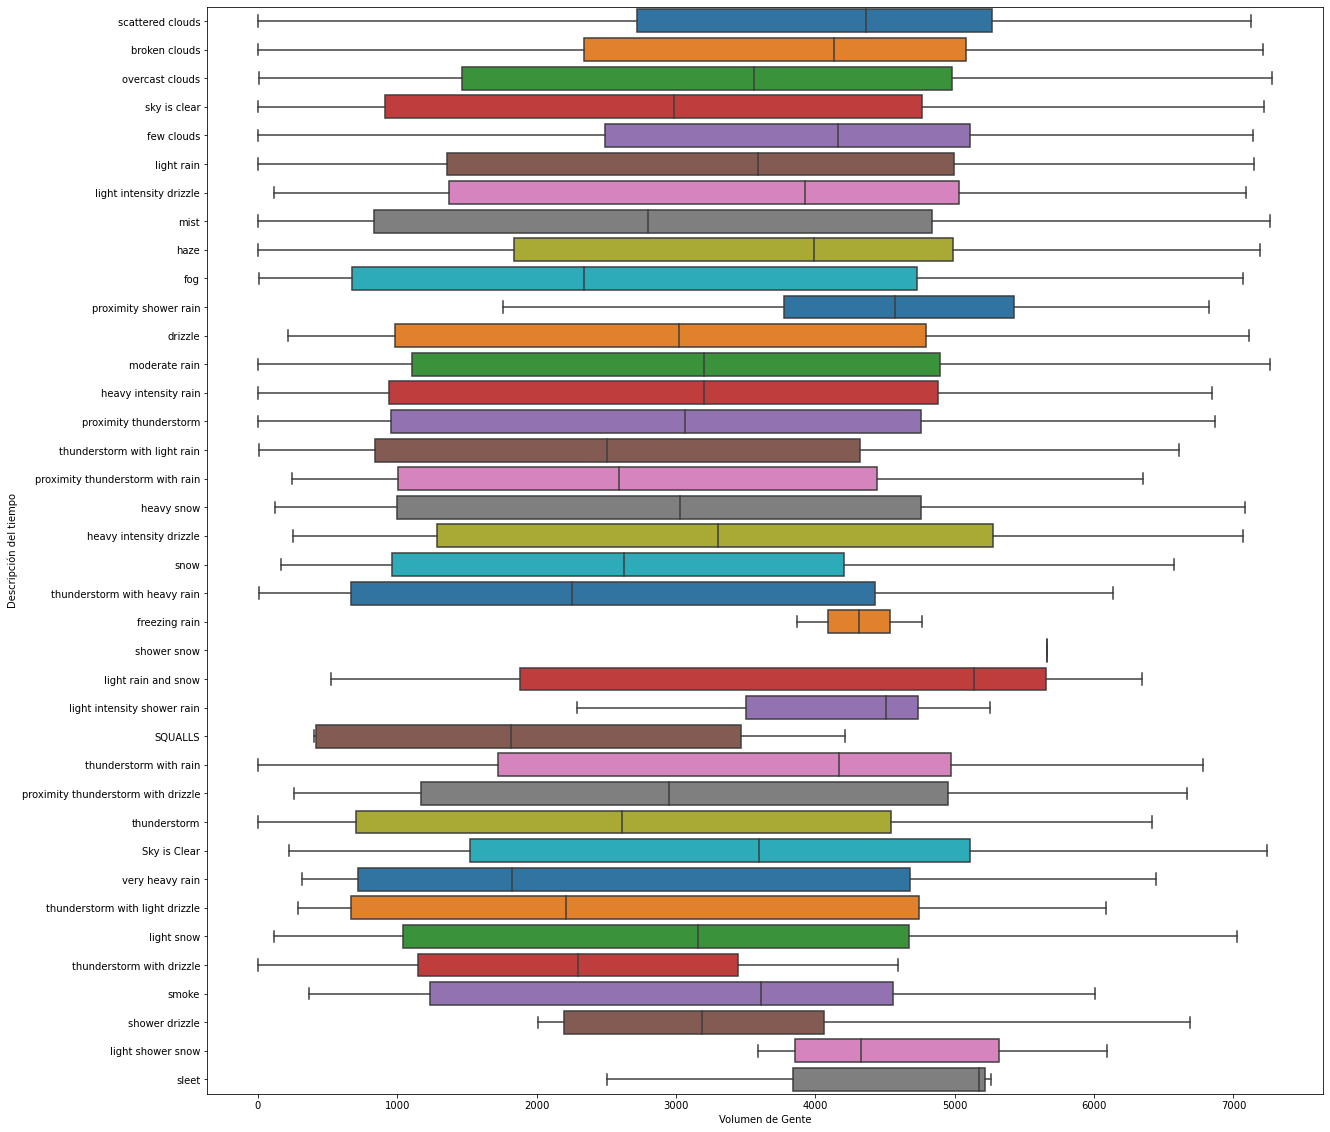

In [61]:
plt.figure(figsize=(20, 20))

sns.boxplot(y="weather_description", x= "traffic_volume", data= df, palette="tab10")
plt.xlabel("Volumen de Gente")
plt.ylabel("Descripción del tiempo");


Vemos que no tiene sentido que valoremos está columna"weather_description" porque tiene información mejor categorizada para nuestro estudio la de "weather_main". En caso de tener que eliminar una de las dos quitaríamos la de "weather description".

Text(0, 0.5, 'Descripción del tiempo')

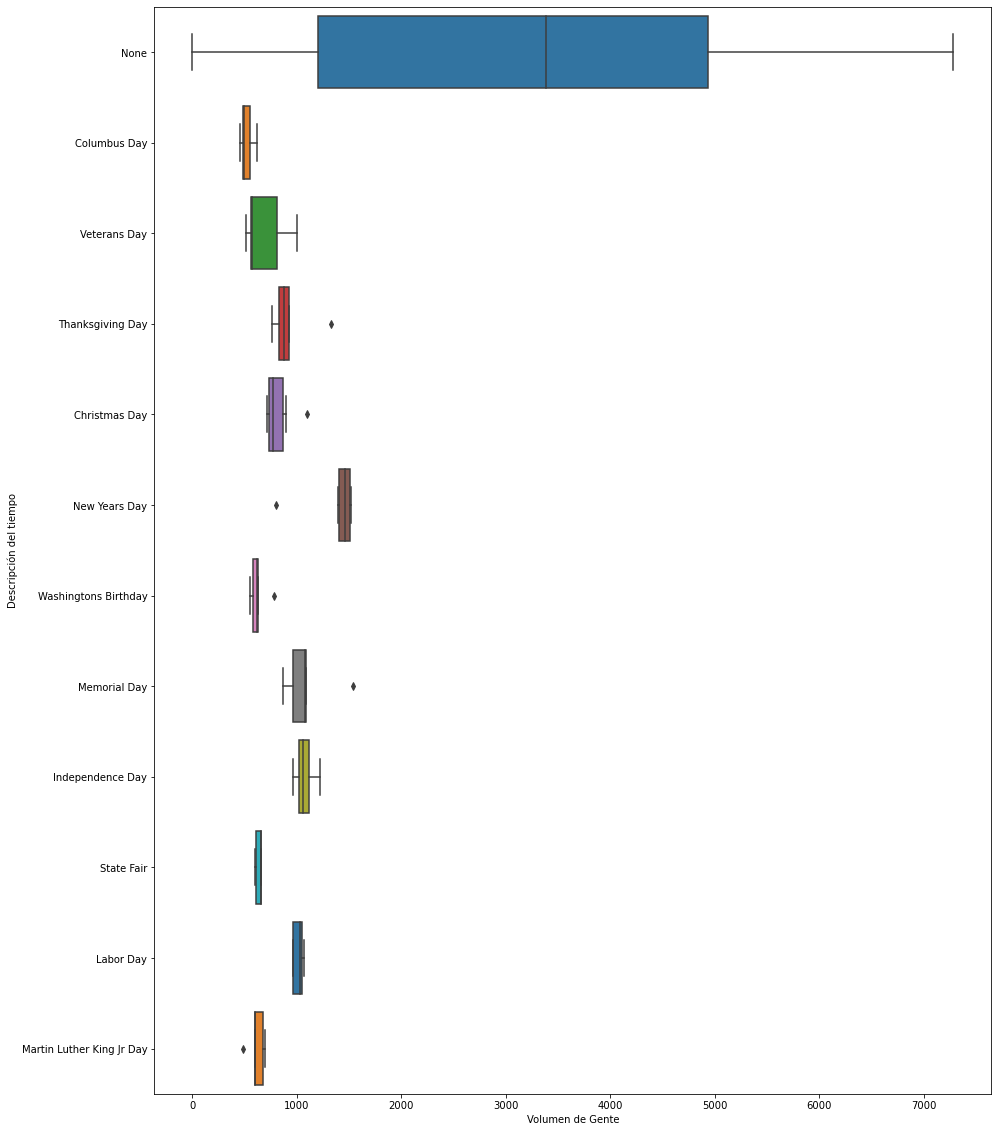

In [62]:
plt.figure(figsize=(15, 20))

sns.boxplot(y="holiday", x= "traffic_volume", data= df, palette="tab10")
plt.xlabel("Volumen de Gente")
plt.ylabel("Descripción del tiempo")

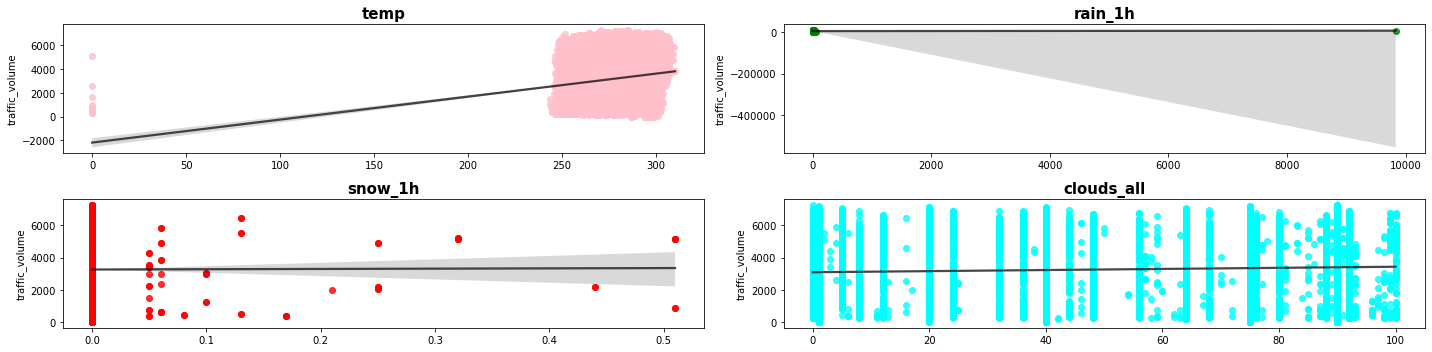

In [63]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 5))

lista_colores = ["pink", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat


columnas_numeric = df.select_dtypes(include = np.number).drop('traffic_volume', axis=1)
columnas_numeric = columnas_numeric.columns


for i, colum in enumerate(columnas_numeric): 
    sns.regplot(data = df, x = colum, y = 'traffic_volume', color = lista_colores[i], line_kws = {"color": "black", "alpha": 0.7 }, ax = axes[i])
    
   
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    axes[i].tick_params(labelsize = 10)

    axes[i].set_xlabel("")

fig.tight_layout();

Creemos que hay homocedasticidad en las variables de "temp" y "clouds_all". Y parece que tenemos heterocedasticidad en las variables restantes.

In [64]:
df["holiday"].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [65]:
festivo = df[df["holiday"]!= "None"]["traffic_volume"]
no_festivo =df[df["holiday"]== "None"]["traffic_volume"]

In [66]:
# Usaremos test levene para la parte analítica de la varianza, ya que nuestros datos no se distribuyen de manera normal.

levene_test = stats.levene(festivo, no_festivo)
levene_test

LeveneResult(statistic=149.92684277246298, pvalue=2.0237966542201124e-34)

Ya que el p-valor es mayor que 0.05 aceptamos la H0, por tanto nuestra varianza en la variable "holiday" es homocedastica 

___

- Independencia de las variables


In [67]:
crosstab, test_results, expected = rp.crosstab(df["holiday"], df["weather_main"], test= "chi-square", expected_freqs= True, prop= "cell")


In [68]:
crosstab.head()

weather_main                                     \
weather_main                     Clear Clouds Drizzle  Fog Haze Mist Rain   
holiday                                                                     
Christmas Day                     0.00    0.0     0.0  0.0  0.0  0.0  0.0   
Columbus Day                      0.01    0.0     0.0  0.0  0.0  0.0  0.0   
Independence Day                  0.01    0.0     0.0  0.0  0.0  0.0  0.0   
Labor Day                         0.00    0.0     0.0  0.0  0.0  0.0  0.0   
Martin Luther King Jr Day         0.00    0.0     0.0  0.0  0.0  0.0  0.0   

                                                                
weather_main              Smoke Snow Squall Thunderstorm   All  
holiday                                                         
Christmas Day               0.0  0.0    0.0          0.0  0.01  
Columbus Day                0.0  0.0    0.0          0.0  0.01  
Independence Day            0.0  0.0    0.0          0.0  0.01  
Labor Day                   0.0  0.0    0.0          0.0  0.01  
Martin Luther King Jr Day   0.0  0.0    0.0          0.0  0.01

In [71]:
expected

weather_main                             \
weather_main                      Clear        Clouds      Drizzle   
holiday                                                              
Christmas Day                  1.666508      1.887397     0.226617   
Columbus Day                   1.388756      1.572831     0.188848   
Independence Day               1.388756      1.572831     0.188848   
Labor Day                      1.944259      2.201963     0.264387   
Martin Luther King Jr Day      1.666508      1.887397     0.226617   
Memorial Day                   1.388756      1.572831     0.188848   
New Years Day                  1.666508      1.887397     0.226617   
None                       13367.057173  15138.811464  1817.696059   
State Fair                     1.388756      1.572831     0.188848   
Thanksgiving Day               1.666508      1.887397     0.226617   
Veterans Day                   1.388756      1.572831     0.188848   
Washingtons Birthday           1.388756      1.572831     0.188848   

                                                                              \
weather_main                      Fog         Haze         Mist         Rain   
holiday                                                                        
Christmas Day                0.113558     0.169340     0.740739     0.706249   
Columbus Day                 0.094631     0.141117     0.617283     0.588540   
Independence Day             0.094631     0.141117     0.617283     0.588540   
Labor Day                    0.132484     0.197564     0.864196     0.823957   
Martin Luther King Jr Day    0.113558     0.169340     0.740739     0.706249   
Memorial Day                 0.094631     0.141117     0.617283     0.588540   
New Years Day                0.113558     0.169340     0.740739     0.706249   
None                       910.845498  1358.278374  5941.469151  5664.819806   
State Fair                   0.094631     0.141117     0.617283     0.588540   
Thanksgiving Day             0.113558     0.169340     0.740739     0.706249   
Veterans Day                 0.094631     0.141117     0.617283     0.588540   
Washingtons Birthday         0.094631     0.141117     0.617283     0.588540   

                                                                          
weather_main                   Smoke         Snow    Squall Thunderstorm  
holiday                                                                   
Christmas Day               0.002490     0.357980  0.000498     0.128624  
Columbus Day                0.002075     0.298317  0.000415     0.107187  
Independence Day            0.002075     0.298317  0.000415     0.107187  
Labor Day                   0.002905     0.417644  0.000581     0.150061  
Martin Luther King Jr Day   0.002490     0.357980  0.000498     0.128624  
Memorial Day                0.002075     0.298317  0.000415     0.107187  
New Years Day               0.002490     0.357980  0.000498     0.128624  
None                       19.974682  2871.360533  3.994936  1031.692324  
State Fair                  0.002075     0.298317  0.000415     0.107187  
Thanksgiving Day            0.002490     0.357980  0.000498     0.128624  
Veterans Day                0.002075     0.298317  0.000415     0.107187  
Washingtons Birthday        0.002075     0.298317  0.000415     0.107187

In [70]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 110.0) =,103.1857
1,p-value =,0.6642
2,Cramer's V =,0.0146


Dado que el p-valor es mayor de 0.05 , las variables comparadas son independientes ya que aceptamos la H0

Vamos ha hacer la prueba entre "weather_description" y "weather_main", aunqu eimaginamos que estarán muy relacionadas, ya que una bebe de la otra.

In [73]:
crosstab, test_results, expected = rp.crosstab(df["weather_description"], df["weather_main"], test= "chi-square", expected_freqs= True, prop= "cell")

In [74]:
crosstab

weather_main                             \
weather_main                               Clear Clouds Drizzle   Fog  Haze   
weather_description                                                           
SQUALLS                                     0.00   0.00    0.00  0.00  0.00   
Sky is Clear                                3.58   0.00    0.00  0.00  0.00   
broken clouds                               0.00   9.68    0.00  0.00  0.00   
drizzle                                     0.00   0.00    1.35  0.00  0.00   
few clouds                                  0.00   4.06    0.00  0.00  0.00   
fog                                         0.00   0.00    0.00  1.89  0.00   
freezing rain                               0.00   0.00    0.00  0.00  0.00   
haze                                        0.00   0.00    0.00  0.00  2.82   
heavy intensity drizzle                     0.00   0.00    0.13  0.00  0.00   
heavy intensity rain                        0.00   0.00    0.00  0.00  0.00   
heavy snow                                  0.00   0.00    0.00  0.00  0.00   
light intensity drizzle                     0.00   0.00    2.28  0.00  0.00   
light intensity shower rain                 0.00   0.00    0.00  0.00  0.00   
light rain                                  0.00   0.00    0.00  0.00  0.00   
light rain and snow                         0.00   0.00    0.00  0.00  0.00   
light shower snow                           0.00   0.00    0.00  0.00  0.00   
light snow                                  0.00   0.00    0.00  0.00  0.00   
mist                                        0.00   0.00    0.00  0.00  0.00   
moderate rain                               0.00   0.00    0.00  0.00  0.00   
overcast clouds                             0.00  10.54    0.00  0.00  0.00   
proximity shower rain                       0.00   0.00    0.00  0.00  0.00   
proximity thunderstorm                      0.00   0.00    0.00  0.00  0.00   
proximity thunderstorm with drizzle         0.00   0.00    0.00  0.00  0.00   
proximity thunderstorm with rain            0.00   0.00    0.00  0.00  0.00   
scattered clouds                            0.00   7.18    0.00  0.00  0.00   
shower drizzle                              0.00   0.00    0.01  0.00  0.00   
shower snow                                 0.00   0.00    0.00  0.00  0.00   
sky is clear                               24.20   0.00    0.00  0.00  0.00   
sleet                                       0.00   0.00    0.00  0.00  0.00   
smoke                                       0.00   0.00    0.00  0.00  0.00   
snow                                        0.00   0.00    0.00  0.00  0.00   
thunderstorm                                0.00   0.00    0.00  0.00  0.00   
thunderstorm with drizzle                   0.00   0.00    0.00  0.00  0.00   
thunderstorm with heavy rain                0.00   0.00    0.00  0.00  0.00   
thunderstorm with light drizzle             0.00   0.00    0.00  0.00  0.00   
thunderstorm with light rain                0.00   0.00    0.00  0.00  0.00   
thunderstorm with rain                      0.00   0.00    0.00  0.00  0.00   
very heavy rain                             0.00   0.00    0.00  0.00  0.00   
All                                        27.78  31.46    3.78  1.89  2.82   

                                                                      \
weather_main                          Mist   Rain Smoke  Snow Squall   
weather_description                                                    
SQUALLS                               0.00   0.00  0.00  0.00   0.01   
Sky is Clear                          0.00   0.00  0.00  0.00   0.00   
broken clouds                         0.00   0.00  0.00  0.00   0.00   
drizzle                               0.00   0.00  0.00  0.00   0.00   
few clouds                            0.00   0.00  0.00  0.00   0.00   
fog                                   0.00   0.00  0.00  0.00   0.00   
freezing rain                         0.00   0.00  0.00  0.00   0.00 

In [75]:
expected

weather_main                           \
weather_main                               Clear       Clouds     Drizzle   
weather_description                                                         
SQUALLS                                 1.111005     1.258265    0.151078   
Sky is Clear                          479.120925   542.626642   65.152427   
broken clouds                        1295.154129  1466.822047  176.119285   
drizzle                               180.816071   204.782576   24.587959   
few clouds                            543.281466   615.291427   73.877187   
fog                                   253.309150   286.884346   34.445805   
freezing rain                           0.555503     0.629132    0.075539   
haze                                  377.741715   427.809990   51.366551   
heavy intensity drizzle                17.776081    20.132235    2.417249   
heavy intensity rain                  129.709839   146.902401   17.638367   
heavy snow                            171.094777   193.772760   23.266026   
light intensity drizzle               305.248636   345.708220   41.508706   
light intensity shower rain             3.610766     4.089360    0.491004   
light rain                            936.577251  1060.717123  127.358831   
light rain and snow                     1.666508     1.887397    0.226617   
light shower snow                       3.055264     3.460228    0.415465   
light snow                            540.226202   611.831199   73.461722   
mist                                 1652.342250  1871.354141  224.690892   
moderate rain                         462.178098   523.438106   62.848486   
overcast clouds                      1410.698653  1597.681574  191.831407   
proximity shower rain                  37.774171    42.780999    5.136655   
proximity thunderstorm                186.926598   211.703032   25.418889   
proximity thunderstorm with drizzle     3.610766     4.089360    0.491004   
proximity thunderstorm with rain       14.443066    16.357441    1.964015   
scattered clouds                      961.019362  1088.398946  130.682549   
shower drizzle                          1.666508     1.887397    0.226617   
shower snow                             0.277751     0.314566    0.037770   
sky is clear                         3238.301949  3667.526968  440.354867   
sleet                                   0.833254     0.943699    0.113309   
smoke                                   5.555025     6.291323    0.755390   
snow                                   81.381119    92.167888   11.066470   
thunderstorm                           34.441156    39.006205    4.683421   
thunderstorm with drizzle               0.555503     0.629132    0.075539   
thunderstorm with heavy rain           17.498329    19.817669    2.379480   
thunderstorm with light drizzle         4.166269     4.718493    0.566543   
thunderstorm with light rain           14.998568    16.986573    2.039554   
thunderstorm with rain                 10.276797    11.638948    1.397472   
very heavy rain                         4.999523     5.662191    0.679851   

                                                                          \
weather_main                                Fog        Haze         Mist   
weather_description                                                        
SQUALLS                                0.075705    0.112894     0.493826   
Sky is Clear                          32.647810   48.685330   212.962521   
broken clouds                         88.253180  131.605620   575.677818   
drizzle                               12.320999   18.373420    80.370204   
few clouds                            37.019777   55.204931   241.480980   
fog                                   17.260755   25.739722   112.592359   
freezing rain                          0.037853    0.056447     0.246913   
haze                                  25.739722   38.383796   167.900886   
heavy intensity drizzle                1.2

In [76]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 370.0) =,481870.0
1,p-value =,0.0
2,Cramer's V =,1.0


Obviamente el p-valor es menor de 0.05 y por tanto rechazamos H0, lo que quiere decir que las variables de "weather_description" y "weather_main" son dependientes.